In [5]:
import pandas as pd
import numpy as np
import mysql.connector
import config

import seaborn as sns
import matplotlib.pyplot as plt
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


# Initial run: pretty low R, around .19
# so we're missing pieces of the puzzle

### You could definitely boost the R by adding in 'amount of coal burned'
### but that would defeat the purpose of a socioeconomic analysis of pollution

### let's pull some more data

In [7]:
# grabbed gini coefficients from world bank
gini = pd.read_csv('gini.csv')

In [16]:
gin = gini.loc[:,'2010':'2018']

In [18]:
gin.isna().sum() # wow that's a lot of nulls for a 

2010    180
2011    187
2012    185
2013    188
2014    188
2015    189
2016    225
2017    239
2018    264
dtype: int64

In [12]:
len(gini)

264

In [11]:
gini.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
1961              264
1962              264
1963              264
1964              264
1965              264
1966              264
1967              264
1968              264
1969              264
1970              264
1971              264
1972              264
1973              264
1974              264
1975              264
1976              264
1977              264
1978              264
1979              261
1980              262
1981              257
1982              263
1983              261
1984              259
1985              255
                 ... 
1990              248
1991              250
1992              238
1993              241
1994              242
1995              239
1996              234
1997              242
1998              227
1999              236
2000              230
2001              230
2002              217
2003              209
2004      

In [40]:
murder = pd.read_csv('homicide.csv')

In [27]:
murder.isna().sum()

country          0
Source           0
2000            79
2001            95
2002            95
2003            80
2004            69
2005            46
2006            65
2007            64
2008            51
2009            54
2010            34
2011            71
2012            67
2013            92
2014            98
2015            88
2016           131
Unnamed: 19    230
dtype: int64

In [33]:
murder.head(15)

,country,2015
0,Burundi,\t461
1,Comoros,\t60
2,Djibouti,\t60
3,Eritrea,\t390
4,Ethiopia,"\t7,552"
5,Kenya,"\t2,261"
6,Madagascar,"\t1,863"
7,Malawi,NaN
8,Mauritius,\t21
9,Mayotte,NaN


In [41]:
murder['2015'] = murder['2015'].str.replace('\t', '', regex=True)

In [42]:
murder.head()

,country,Source,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 19
0,Burundi,CTS/SDG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\t341,\t376,\t347,\t349,\t500,\t520,\t564,461,\t635,NaN
1,Comoros,WHO Estimate,\t56,NaN,NaN,NaN,NaN,\t58,NaN,NaN,NaN,NaN,\t59,NaN,NaN,NaN,NaN,60,NaN,NaN
2,Djibouti,WHO Estimate,\t64,NaN,NaN,NaN,NaN,\t63,NaN,NaN,NaN,NaN,\t63,NaN,NaN,NaN,NaN,60,NaN,NaN
3,Eritrea,WHO Estimate,\t335,NaN,NaN,NaN,NaN,\t382,NaN,NaN,NaN,NaN,\t389,NaN,NaN,NaN,NaN,390,NaN,NaN
4,Ethiopia,WHO Estimate,"\t7,113",NaN,NaN,NaN,NaN,"\t7,214",NaN,NaN,NaN,NaN,"\t7,419",NaN,NaN,NaN,NaN,"7,552",NaN,NaN


In [43]:
cols_keep = ['country','2015']

In [44]:
murder = murder[cols_keep]

In [45]:
murder.head() # murder dataset cleaned

,country,2015
0,Burundi,461
1,Comoros,60
2,Djibouti,60
3,Eritrea,390
4,Ethiopia,"7,552"


In [46]:
anml = pd.read_csv('meat_milk.csv')

In [48]:
anml.head(15)


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QL,Livestock Primary,2,Afghanistan,5510,Production,1127,"Meat, camel",2016,2016,tonnes,3599.0,Im,FAO data based on imputation methodology
1,QL,Livestock Primary,2,Afghanistan,5510,Production,867,"Meat, cattle",2016,2016,tonnes,104515.0,Im,FAO data based on imputation methodology
2,QL,Livestock Primary,2,Afghanistan,5510,Production,1058,"Meat, chicken",2016,2016,tonnes,24434.0,Im,FAO data based on imputation methodology
3,QL,Livestock Primary,2,Afghanistan,5510,Production,1163,"Meat, game",2016,2016,tonnes,7980.0,Im,FAO data based on imputation methodology
4,QL,Livestock Primary,2,Afghanistan,5510,Production,1017,"Meat, goat",2016,2016,tonnes,46023.0,Im,FAO data based on imputation methodology
5,QL,Livestock Primary,2,Afghanistan,5510,Production,977,"Meat, sheep",2016,2016,tonnes,107694.0,Im,FAO data based on imputation methodology
6,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",2016,2016,tonnes,294245.0,A,"Aggregate, may include official, semi-official..."
7,QL,Livestock Primary,3,Albania,5510,Production,867,"Meat, cattle",2016,2016,tonnes,38880.0,NaN,Official data
8,QL,Livestock Primary,3,Albania,5510,Production,1058,"Meat, chicken",2016,2016,tonnes,12702.0,NaN,Official data
9,QL,Livestock Primary,3,Albania,5510,Production,1017,"Meat, goat",2016,2016,tonnes,9731.0,NaN,Official data


In [49]:
animals = anml[anml['Flag']=='A']

In [53]:
animals.head()

,Domain Code,Domain,Area Code,country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,meat_milk_tn,Flag,Flag Description
6,QL,Livestock Primary,2,Afghanistan,5510,Production,1765,"Meat, Total",2016,2016,tonnes,294245.0,A,"Aggregate, may include official, semi-official..."
13,QL,Livestock Primary,3,Albania,5510,Production,1765,"Meat, Total",2016,2016,tonnes,89452.0,A,"Aggregate, may include official, semi-official..."
23,QL,Livestock Primary,4,Algeria,5510,Production,1765,"Meat, Total",2016,2016,tonnes,745909.0,A,"Aggregate, may include official, semi-official..."
28,QL,Livestock Primary,5,American Samoa,5510,Production,1765,"Meat, Total",2016,2016,tonnes,338.0,A,"Aggregate, may include official, semi-official..."
35,QL,Livestock Primary,7,Angola,5510,Production,1765,"Meat, Total",2016,2016,tonnes,285661.0,A,"Aggregate, may include official, semi-official..."


In [52]:
animals = animals.rename(columns={'Area':'country','Value':'meat_milk_tn'})

In [54]:
cols_keep = ['country','meat_milk_tn']
anml = animals[cols_keep]

In [55]:
anml.head() # anml dataset cleaned

,country,meat_milk_tn
6,Afghanistan,294245.0
13,Albania,89452.0
23,Algeria,745909.0
28,American Samoa,338.0
35,Angola,285661.0


In [56]:
ef = pd.read_csv('gdp_energy.csv')

In [57]:
ef.head()

,country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,11.959208,12.162955,12.260996,13.077806,13.219101,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,13.204362,13.344014,15.302068,13.191836,13.926832,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
cols_keep=['country','2014']

In [59]:
gdp_en = ef[cols_keep]

In [60]:
gdp_en.head()

,country,2014
0,Aruba,NaN
1,Afghanistan,NaN
2,Angola,13.219101
3,Albania,13.926832
4,Andorra,NaN


In [63]:
energy_value = gdp_en.dropna()

In [154]:
len(energy_value)

171

In [65]:
energy_value.head(10)

,country,2014
2,Angola,13.219101
3,Albania,13.926832
5,Arab World,9.081847
6,United Arab Emirates,8.696836
7,Argentina,9.856690
8,Armenia,8.273444
11,Australia,8.787820
12,Austria,12.967171
13,Azerbaijan,11.856175
15,Belgium,9.473750


In [66]:
len(energy_value)

171

In [80]:
print(len(murder),len(anml),len(energy_value))

230 232 171


In [83]:
murder.head()

,country,2015
0,Burundi,461
1,Comoros,60
2,Djibouti,60
3,Eritrea,390
4,Ethiopia,"7,552"


In [70]:
anml.head()

,country,meat_milk_tn
6,Afghanistan,294245.0
13,Albania,89452.0
23,Algeria,745909.0
28,American Samoa,338.0
35,Angola,285661.0


In [72]:
energy_value.head()

,country,2014
2,Angola,13.219101
3,Albania,13.926832
5,Arab World,9.081847
6,United Arab Emirates,8.696836
7,Argentina,9.856690


In [75]:
merged = pd.read_csv('merged_thurs')

In [76]:
merged.head()

,Unnamed: 0,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,accountability,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar
0,0,Afghanistan,5.963890e+10,34600200.0,16,172,10,8.54149,1723.66,-1.327690,-2.671050,-1.039840,-1.498190,2.468624e-07,0.000247,21.08110,0.000824,0.62586,1.432201e-10,0.143220
1,1,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,0.189022,0.344645,0.169949,-0.328867,1.442101e-06,0.001442,19.85000,0.853421,1.04950,1.367142e-10,0.136714
2,2,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,-1.171880,-1.097530,-0.863169,-0.857401,3.419863e-06,0.003420,12.21280,10.046100,12.30340,2.505726e-10,0.250573
3,3,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,-1.001380,-0.315899,-1.142930,-1.087320,7.422824e-07,0.000742,9.83117,10.168700,10.74620,1.211280e-10,0.121128
4,4,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,-0.469625,0.204626,0.492563,-0.393606,4.421624e-06,0.004422,6.26457,0.552452,1.13494,2.427840e-10,0.242784


In [81]:
data = data.merge(murder,on='country',how='inner')
data = data.merge(anml,on='country',how='inner')
data = data.merge(energy_value,on='country',how='inner')

In [82]:
data.head()

,Unnamed: 0,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,...,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,2015,meat_milk_tn,2014
0,1,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,0.189022,...,1.442101e-06,0.001442,19.85000,0.853421,1.04950,1.367142e-10,0.136714,66,89452.0,13.926832
1,2,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,-1.171880,...,3.419863e-06,0.003420,12.21280,10.046100,12.30340,2.505726e-10,0.250573,542,745909.0,10.784678
2,3,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,-1.001380,...,7.422824e-07,0.000742,9.83117,10.168700,10.74620,1.211280e-10,0.121128,NaN,285661.0,13.219101
3,4,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,-0.469625,...,4.421624e-06,0.004422,6.26457,0.552452,1.13494,2.427840e-10,0.242784,"2,837",5397512.0,9.856690
4,5,Armenia,2.344670e+10,2921300.0,35,105,35,5.21980,8026.12,0.250056,...,1.786807e-06,0.001787,16.39050,0.000000,4.41208,2.226241e-10,0.222624,75,106144.0,8.273444


In [84]:
data.isna().sum()

Unnamed: 0              0
country                 0
gdp_usd                 0
population              0
CPI                     0
rank                    0
GI_risk                 0
co2_mmt                 0
gdp_capita              0
regulatory_quality      0
political_stability     0
accountability          0
rule_of_law             0
co2_mmt_capita          0
co2_kg_capita           0
GDP_Ag_and_Forest       0
petro_income            0
resource_income         0
co2_dollar              0
co2_kg_dollar           0
2015                   25
meat_milk_tn            0
2014                    0
dtype: int64

In [87]:
# drop murder, don't wanna lose 25 countries
# data = data.drop('2014',axis=1)
data = data.drop('Unnamed: 0',axis=1)

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,...,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,energy_value,meat_milk_tn
0,Albania,3.087580e+10,2.927090e+06,36,99,35,4.22116,10548.300,0.189022,0.344645,...,-0.328867,1.442101e-06,0.001442,19.850000,0.853421,1.049500,1.367142e-10,0.136714,66,89452.0
1,Algeria,5.536240e+11,4.056390e+07,35,105,35,138.72300,13648.200,-1.171880,-1.097530,...,-0.857401,3.419863e-06,0.003420,12.212800,10.046100,12.303400,2.505726e-10,0.250573,542,745909.0
2,Angola,1.768130e+11,2.885290e+07,19,165,22,21.41700,6128.080,-1.001380,-0.315899,...,-1.087320,7.422824e-07,0.000742,9.831170,10.168700,10.746200,1.211280e-10,0.121128,NaN,285661.0
3,Argentina,7.994760e+11,4.389790e+07,40,85,35,194.10000,18212.200,-0.469625,0.204626,...,-0.393606,4.421624e-06,0.004422,6.264570,0.552452,1.134940,2.427840e-10,0.242784,"2,837",5397512.0
4,Armenia,2.344670e+10,2.921300e+06,35,105,35,5.21980,8026.120,0.250056,-0.662264,...,-0.119130,1.786807e-06,0.001787,16.390500,0.000000,4.412080,2.226241e-10,0.222624,75,106144.0
5,Australia,1.088900e+12,2.424600e+07,77,13,71,411.72900,44910.700,1.896970,1.047960,...,1.755520,1.698132e-05,0.016981,2.387300,0.172404,6.095120,3.781146e-10,0.378115,236,4698358.0
6,Austria,3.831180e+11,8.745720e+06,76,14,71,68.10120,43806.300,1.440440,0.909639,...,1.814970,7.786803e-06,0.007787,1.112720,0.023402,0.112891,1.777552e-10,0.177755,46,904071.0
7,Azerbaijan,1.552090e+11,9.713940e+06,25,152,35,35.11740,15978.000,-0.282023,-0.803879,...,-0.519861,3.615155e-06,0.003615,5.605110,13.174400,15.440200,2.262588e-10,0.226259,NaN,302227.0
8,Bahrain,6.107620e+10,1.348410e+06,36,99,35,38.10750,45295.000,0.608239,-0.793426,...,0.456381,2.826106e-05,0.028261,0.332012,1.811240,3.227260,6.239337e-10,0.623934,NaN,25067.0
9,Bangladesh,5.699850e+11,1.629160e+08,26,149,22,79.20480,3498.640,-0.796680,-1.261940,...,-0.663492,4.861696e-07,0.000486,14.045500,0.013982,0.644156,1.389594e-10,0.138959,"4,035",671912.0


In [90]:
data.head()

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,...,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,2015,meat_milk_tn
0,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,0.189022,0.344645,...,-0.328867,1.442101e-06,0.001442,19.85000,0.853421,1.04950,1.367142e-10,0.136714,66,89452.0
1,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,-1.171880,-1.097530,...,-0.857401,3.419863e-06,0.003420,12.21280,10.046100,12.30340,2.505726e-10,0.250573,542,745909.0
2,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,-1.001380,-0.315899,...,-1.087320,7.422824e-07,0.000742,9.83117,10.168700,10.74620,1.211280e-10,0.121128,NaN,285661.0
3,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,-0.469625,0.204626,...,-0.393606,4.421624e-06,0.004422,6.26457,0.552452,1.13494,2.427840e-10,0.242784,"2,837",5397512.0
4,Armenia,2.344670e+10,2921300.0,35,105,35,5.21980,8026.12,0.250056,-0.662264,...,-0.119130,1.786807e-06,0.001787,16.39050,0.000000,4.41208,2.226241e-10,0.222624,75,106144.0


In [91]:
data = data.merge(energy_value,on='country',how='inner')

In [93]:
# data = data.rename(columns={'2014':'energy_value'})

In [94]:
data = data.drop('2015', axis=1)

In [95]:
data.head()

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,...,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,meat_milk_tn,energy_value
0,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,0.189022,0.344645,...,-0.328867,1.442101e-06,0.001442,19.85000,0.853421,1.04950,1.367142e-10,0.136714,89452.0,13.926832
1,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,-1.171880,-1.097530,...,-0.857401,3.419863e-06,0.003420,12.21280,10.046100,12.30340,2.505726e-10,0.250573,745909.0,10.784678
2,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,-1.001380,-0.315899,...,-1.087320,7.422824e-07,0.000742,9.83117,10.168700,10.74620,1.211280e-10,0.121128,285661.0,13.219101
3,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,-0.469625,0.204626,...,-0.393606,4.421624e-06,0.004422,6.26457,0.552452,1.13494,2.427840e-10,0.242784,5397512.0,9.856690
4,Armenia,2.344670e+10,2921300.0,35,105,35,5.21980,8026.12,0.250056,-0.662264,...,-0.119130,1.786807e-06,0.001787,16.39050,0.000000,4.41208,2.226241e-10,0.222624,106144.0,8.273444


In [96]:
data.to_csv('thurs_data.csv')

In [146]:
urb = pd.read_csv('urban.csv')

In [134]:
urb.head()

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Afghanistan,2018,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,7507953.0,1
1,Afghanistan,2017,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2018.0,7148224.0,1
2,Afghanistan,2016,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2017.0,6919560.0,1
3,Afghanistan,2015,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2017.0,6698033.0,1
4,Afghanistan,2014,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2015.0,6483434.0,1


In [ ]:
df1.groupby(["City"])[['Name']].count()


In [147]:
urb['Year'] = pd.to_numeric(urb['Year'])
urb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 9 columns):
country            1184 non-null object
Year               1184 non-null int64
Area               1184 non-null object
Sex                1184 non-null object
Record Type        1184 non-null object
Reliability        1184 non-null object
Source Year        1184 non-null int64
Value              1184 non-null float64
Value Footnotes    636 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 83.3+ KB


In [141]:
urb.groupby(['Year'])[['Value']].count()

,Value
Year,
2008,104
2009,105
2010,133
2011,152
2012,108
2013,99
2014,110
2015,114
2016,108


In [149]:
urban = urb.drop( urb[urb['Year']!=2011].index )

In [150]:
len(urban)

152

In [151]:
len(data)

115

In [152]:
df = pd.read_csv('all_data')

In [153]:
len(df)

144

In [155]:
test = df

In [156]:
test_2 = df.merge(energy_value,on='country',how='inner')
len(test_2)

112

In [157]:
urb = pd.read_csv('urban.csv')

In [158]:
urban = urb.drop( urb[urb['Year']!=2011].index )

In [159]:
len(urban)

152

In [160]:
urban.head(30)

,country,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
7,Afghanistan,2011,Urban,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2013,5.879200e+06,1
18,Åland Islands,2011,Urban,Both Sexes,Estimate - de jure,"Final figure, complete",2012,1.122650e+04,2
22,Albania,2011,Urban,Both Sexes,Census - de jure - complete tabulation,"Final figure, complete",2013,1.498508e+06,NaN
23,Albania,2011,Urban,Both Sexes,Estimate - de jure,"Final figure, complete",2014,1.564139e+06,NaN
42,Argentina,2011,Urban,Both Sexes,Estimate - de facto,"Final figure, complete",2017,3.760051e+07,5
53,Armenia,2011,Urban,Both Sexes,Census - de facto - complete tabulation,"Final figure, complete",2013,1.847124e+06,NaN
54,Armenia,2011,Urban,Both Sexes,Census - de jure - complete tabulation,"Final figure, complete",2013,1.911287e+06,NaN
55,Armenia,2011,Urban,Both Sexes,Estimate - de jure,"Final figure, complete",2017,1.918721e+06,NaN
67,Australia,2011,Urban,Both Sexes,Census - de facto - complete tabulation,"Final figure, complete",2012,1.931264e+07,7
68,Australia,2011,Urban,Both Sexes,Census - de jure - complete tabulation,"Final figure, complete",2012,1.912675e+07,7


In [161]:
ec = pd.read_csv('econ_global.csv')

In [162]:
ec.head()

,code,country,year,KOFGI,KOFGIdf,KOFGIdj,KOFEcGI,KOFEcGIdf,KOFTrGIdf,KOFFiGIdf,...,KOFIpGIdf,KOFInGIdf,KOFCuGIdf,KOFSoGIdj,KOFIpGIdj,KOFInGIdj,KOFCuGIdj,KOFPoGI,KOFPoGIdf,KOFPoGIdj
0,WLD,World,1970,39.692913,39.845913,39.248531,39.737892,36.428768,39.150131,33.587013,...,41.232658,54.319698,26.389977,41.721245,40.291973,39.256908,45.694878,37.531025,40.424179,30.960684
1,WLD,World,1971,40.136501,40.286892,39.698009,40.682404,37.520802,39.760448,35.114147,...,41.989853,54.275967,26.643129,41.669991,40.482605,39.409729,45.198055,37.821915,40.385963,31.288515
2,WLD,World,1972,40.430351,40.336384,40.152206,40.803116,37.627411,39.550415,35.410347,...,42.070316,54.121548,26.754658,41.970051,40.721100,39.405548,45.855656,38.306198,40.476353,32.404816
3,WLD,World,1973,41.063030,41.066437,40.565166,41.358387,38.703144,41.072868,35.702404,...,42.361130,53.790417,26.924311,42.092545,41.122734,39.563980,45.683968,39.374901,41.462814,33.569698
4,WLD,World,1974,41.456829,41.482521,41.049061,41.898155,39.881107,44.055588,35.210205,...,42.386341,53.906143,26.945621,42.312660,41.337936,39.704296,45.993862,39.983551,41.502495,34.627373


In [166]:
# urb['Year'] = pd.to_numeric(urb['Year'])
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10166 entries, 0 to 10165
Data columns (total 25 columns):
code         10166 non-null object
country      10166 non-null object
year         10166 non-null int64
KOFGI        8355 non-null float64
KOFGIdf      8677 non-null float64
KOFGIdj      8539 non-null float64
KOFEcGI      8130 non-null float64
KOFEcGIdf    8544 non-null float64
KOFTrGIdf    8631 non-null float64
KOFFiGIdf    8359 non-null float64
KOFEcGIdj    7637 non-null float64
KOFTrGIdj    7275 non-null float64
KOFFiGIdj    7820 non-null float64
KOFSoGI      8999 non-null float64
KOFSoGIdf    8635 non-null float64
KOFIpGIdf    8678 non-null float64
KOFInGIdf    8009 non-null float64
KOFCuGIdf    8453 non-null float64
KOFSoGIdj    9091 non-null float64
KOFIpGIdj    9275 non-null float64
KOFInGIdj    9053 non-null float64
KOFCuGIdj    8791 non-null float64
KOFPoGI      8999 non-null float64
KOFPoGIdf    9413 non-null float64
KOFPoGIdj    9413 non-null float64
dtypes: float64(2

In [175]:
ec2015 = ec.drop( ec[ec['year']!=2015].index )

In [176]:
len(ec2015)

221

In [189]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 597 to 10165
Data columns (total 25 columns):
code         209 non-null object
country      209 non-null object
year         209 non-null int64
KOFGI        185 non-null float64
KOFGIdf      192 non-null float64
KOFGIdj      189 non-null float64
KOFEcGI      178 non-null float64
KOFEcGIdf    189 non-null float64
KOFTrGIdf    191 non-null float64
KOFFiGIdf    184 non-null float64
KOFEcGIdj    166 non-null float64
KOFTrGIdj    157 non-null float64
KOFFiGIdj    170 non-null float64
KOFSoGI      199 non-null float64
KOFSoGIdf    191 non-null float64
KOFIpGIdf    192 non-null float64
KOFInGIdf    190 non-null float64
KOFCuGIdf    207 non-null float64
KOFSoGIdj    201 non-null float64
KOFIpGIdj    205 non-null float64
KOFInGIdj    201 non-null float64
KOFCuGIdj    194 non-null float64
KOFPoGI      199 non-null float64
KOFPoGIdf    208 non-null float64
KOFPoGIdj    208 non-null float64
dtypes: float64(22), int64(1), object(2)
memo

In [191]:
cols_keep = ['country','KOFGI']
ec_global = econ[cols_keep]

In [192]:

ec_global.head(20)

,country,KOFGI
597,Aruba,NaN
643,Andorra,NaN
689,Afghanistan,38.658775
735,Angola,41.751495
781,Albania,67.185555
827,Netherlands Antilles,NaN
873,United Arab Emirates,74.396881
919,Argentina,63.024387
965,Armenia,67.085106
1011,American Samoa,NaN


In [203]:
ec = ec_global.dropna()

In [196]:
data

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,...,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,meat_milk_tn,energy_value
0,Albania,3.087580e+10,2.927090e+06,36,99,35,4.22116,10548.300,0.189022,0.344645,...,-0.328867,1.442101e-06,0.001442,19.850000,0.853421,1.049500,1.367142e-10,0.136714,89452.0,13.926832
1,Algeria,5.536240e+11,4.056390e+07,35,105,35,138.72300,13648.200,-1.171880,-1.097530,...,-0.857401,3.419863e-06,0.003420,12.212800,10.046100,12.303400,2.505726e-10,0.250573,745909.0,10.784678
2,Angola,1.768130e+11,2.885290e+07,19,165,22,21.41700,6128.080,-1.001380,-0.315899,...,-1.087320,7.422824e-07,0.000742,9.831170,10.168700,10.746200,1.211280e-10,0.121128,285661.0,13.219101
3,Argentina,7.994760e+11,4.389790e+07,40,85,35,194.10000,18212.200,-0.469625,0.204626,...,-0.393606,4.421624e-06,0.004422,6.264570,0.552452,1.134940,2.427840e-10,0.242784,5397512.0,9.856690
4,Armenia,2.344670e+10,2.921300e+06,35,105,35,5.21980,8026.120,0.250056,-0.662264,...,-0.119130,1.786807e-06,0.001787,16.390500,0.000000,4.412080,2.226241e-10,0.222624,106144.0,8.273444
5,Australia,1.088900e+12,2.424600e+07,77,13,71,411.72900,44910.700,1.896970,1.047960,...,1.755520,1.698132e-05,0.016981,2.387300,0.172404,6.095120,3.781146e-10,0.378115,4698358.0,8.787820
6,Austria,3.831180e+11,8.745720e+06,76,14,71,68.10120,43806.300,1.440440,0.909639,...,1.814970,7.786803e-06,0.007787,1.112720,0.023402,0.112891,1.777552e-10,0.177755,904071.0,12.967171
7,Azerbaijan,1.552090e+11,9.713940e+06,25,152,35,35.11740,15978.000,-0.282023,-0.803879,...,-0.519861,3.615155e-06,0.003615,5.605110,13.174400,15.440200,2.262588e-10,0.226259,302227.0,11.856175
8,Bahrain,6.107620e+10,1.348410e+06,36,99,35,38.10750,45295.000,0.608239,-0.793426,...,0.456381,2.826106e-05,0.028261,0.332012,1.811240,3.227260,6.239337e-10,0.623934,25067.0,4.372498
9,Bangladesh,5.699850e+11,1.629160e+08,26,149,22,79.20480,3498.640,-0.796680,-1.261940,...,-0.663492,4.861696e-07,0.000486,14.045500,0.013982,0.644156,1.389594e-10,0.138959,671912.0,14.137127


In [206]:
tes = df.merge(ec,on='country',how='inner')

In [209]:
tes.head(35)

,Unnamed: 0,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,...,accountability,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,KOFGI
0,0,Afghanistan,5.963890e+10,3.460020e+07,16,172,10,8.541490,1723.660,-1.327690,...,-1.039840,-1.498190,2.468624e-07,0.000247,21.081100,0.000824,0.625860,1.432201e-10,0.143220,38.658775
1,1,Albania,3.087580e+10,2.927090e+06,36,99,35,4.221160,10548.300,0.189022,...,0.169949,-0.328867,1.442101e-06,0.001442,19.850000,0.853421,1.049500,1.367142e-10,0.136714,67.185555
2,2,Algeria,5.536240e+11,4.056390e+07,35,105,35,138.723000,13648.200,-1.171880,...,-0.863169,-0.857401,3.419863e-06,0.003420,12.212800,10.046100,12.303400,2.505726e-10,0.250573,53.182339
3,3,Angola,1.768130e+11,2.885290e+07,19,165,22,21.417000,6128.080,-1.001380,...,-1.142930,-1.087320,7.422824e-07,0.000742,9.831170,10.168700,10.746200,1.211280e-10,0.121128,41.751495
4,4,Argentina,7.994760e+11,4.389790e+07,40,85,35,194.100000,18212.200,-0.469625,...,0.492563,-0.393606,4.421624e-06,0.004422,6.264570,0.552452,1.134940,2.427840e-10,0.242784,63.024387
5,5,Armenia,2.344670e+10,2.921300e+06,35,105,35,5.219800,8026.120,0.250056,...,-0.579335,-0.119130,1.786807e-06,0.001787,16.390500,0.000000,4.412080,2.226241e-10,0.222624,67.085106
6,6,Australia,1.088900e+12,2.424600e+07,77,13,71,411.729000,44910.700,1.896970,...,1.351010,1.755520,1.698132e-05,0.016981,2.387300,0.172404,6.095120,3.781146e-10,0.378115,79.289047
7,7,Austria,3.831180e+11,8.745720e+06,76,14,71,68.101200,43806.300,1.440440,...,1.337420,1.814970,7.786803e-06,0.007787,1.112720,0.023402,0.112891,1.777552e-10,0.177755,87.908958
8,8,Azerbaijan,1.552090e+11,9.713940e+06,25,152,35,35.117400,15978.000,-0.282023,...,-1.563100,-0.519861,3.615155e-06,0.003615,5.605110,13.174400,15.440200,2.262588e-10,0.226259,59.288193
9,9,Bahrain,6.107620e+10,1.348410e+06,36,99,35,38.107500,45295.000,0.608239,...,-1.372130,0.456381,2.826106e-05,0.028261,0.332012,1.811240,3.227260,6.239337e-10,0.623934,65.949715


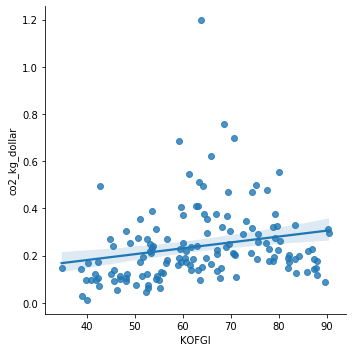

In [210]:
sns.lmplot(x="KOFGI", y="co2_kg_dollar",
               truncate=True, height=5, data=tes)

In [212]:
tes.to_csv('include_global.csv')